In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.filterwarnings(action = "ignore")

In [3]:
sl = pd.read_csv("salary.csv")

In [4]:
sl.head(10)

,Unnamed: 0,age,Workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [5]:
cat_fe = ["Workclass","education","occupation","native-country"]

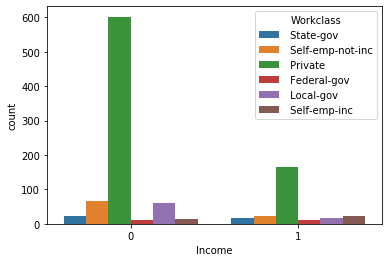

------------------------------------------------------


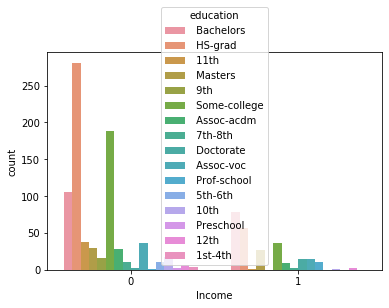

------------------------------------------------------


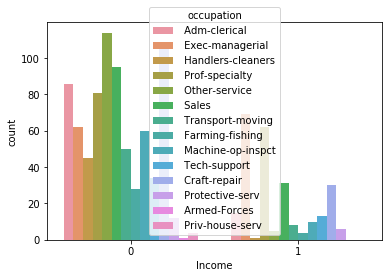

------------------------------------------------------


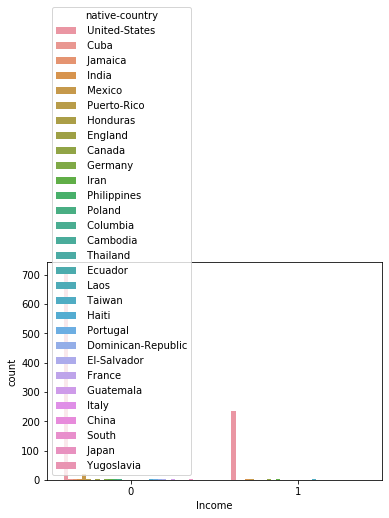

------------------------------------------------------


In [6]:
for col in cat_fe:
    plt.figure()
    sns.countplot(data = sl,x = "Income",hue = col)
    plt.show()
    print("------------------------------------------------------")

### Workclass column might affect the target

In [7]:
num_fe = ["age","education-num","capital-gain","hours-per-week"]

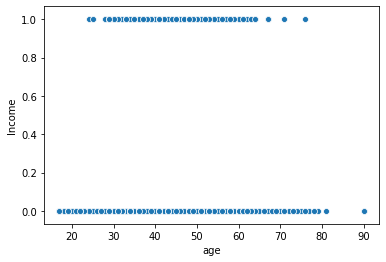

---------------------------------------------------


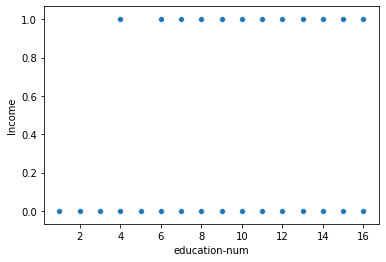

---------------------------------------------------


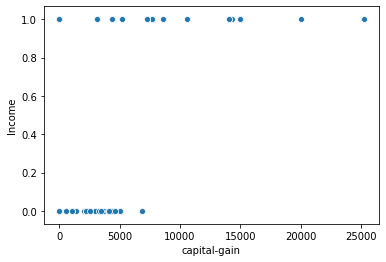

---------------------------------------------------


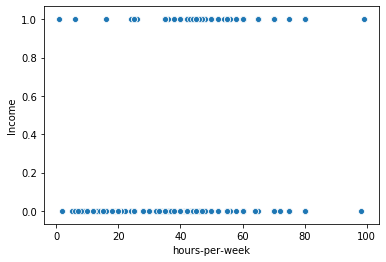

---------------------------------------------------


In [8]:
for col in num_fe:
    plt.figure()
    sns.scatterplot(data = sl, x = col,y = "Income")
    plt.show()
    print("---------------------------------------------------")

### Lets first convert the categorical columns to numerical column

In [9]:
sl_2 = sl[["age","education-num","capital-gain","hours-per-week"]]

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
le.fit_transform(sl["Workclass"])
sl_2["Workclass_enc"] = le.fit_transform(sl["Workclass"])

In [12]:
le.fit_transform(sl["education"])
sl_2["education_enc"] = le.fit_transform(sl["education"])
le.fit_transform(sl["occupation"])
sl_2["occupation_enc"] = le.fit_transform(sl["occupation"])
le.fit_transform(sl["native-country"])
sl_2["native-country_enc"] = le.fit_transform(sl["native-country"])

In [13]:
sl_2["income"] = sl["Income"]

In [14]:
sl_2.head(10)

,age,education-num,capital-gain,hours-per-week,Workclass_enc,education_enc,occupation_enc,native-country_enc,income
0,39,13,2174,40,5,9,0,28,0
1,50,13,0,13,4,9,3,28,0
2,38,9,0,40,2,11,5,28,0
3,53,7,0,40,2,1,5,28,0
4,28,13,0,40,2,9,9,4,0
5,37,14,0,40,2,12,3,28,0
6,49,5,0,16,2,6,7,17,0
7,52,9,0,45,4,11,3,28,1
8,31,14,14084,50,2,12,9,28,1
9,42,13,5178,40,2,9,3,28,1


## Baseline Model

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,precision_score,recall_score

In [16]:
def train_model(X_train,X_test):
    log = LogisticRegression()
    log.fit(X_train,y_train)
    y_pred = log.predict(X_test)
    print(classification_report(y_test,y_pred))

In [17]:
X = sl_2.iloc[:,:-1]
y = sl_2.iloc[:,-1]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [19]:
train_model(X_train,X_test)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       238
           1       0.62      0.21      0.31        72

    accuracy                           0.79       310
   macro avg       0.71      0.59      0.59       310
weighted avg       0.76      0.79      0.74       310



## Filter Method

In [20]:
from sklearn.feature_selection import chi2             #chi2 test
from sklearn.feature_selection import f_regression     # ANOVA test
from sklearn.feature_selection import SelectKBest      # common function for both

### chi2 test

In [21]:
chi2 = SelectKBest(score_func = chi2, k = 5)

In [22]:
X_train_chi = chi2.fit_transform(X_train,y_train)

In [23]:
X_test_chi = chi2.transform(X_test)

In [24]:
train_model(X_train_chi,X_test_chi)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       238
           1       0.71      0.38      0.49        72

    accuracy                           0.82       310
   macro avg       0.77      0.66      0.69       310
weighted avg       0.81      0.82      0.80       310



In [25]:
chi2.scores_

array([1.43215169e+02, 4.51886417e+01, 7.86853758e+05, 1.23675492e+02,
       1.60667219e+00, 6.46272080e-01, 2.69228910e-01, 5.29629278e-02])

In [26]:
sl_2.columns

Index(['age', 'education-num', 'capital-gain', 'hours-per-week',
       'Workclass_enc', 'education_enc', 'occupation_enc',
       'native-country_enc', 'income'],
      dtype='object')

In [27]:
chi2.get_support()

array([ True,  True,  True,  True,  True, False, False, False])

#### ANOVA Test

In [28]:
anova = SelectKBest(score_func = f_regression,k = 4)

In [29]:
X_train_f = anova.fit_transform(X_train,y_train)
X_test_f = anova.transform(X_test)

In [30]:
train_model(X_train_f,X_test_f)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       238
           1       0.69      0.35      0.46        72

    accuracy                           0.81       310
   macro avg       0.76      0.65      0.67       310
weighted avg       0.80      0.81      0.79       310



In [31]:
anova.scores_

array([35.87430298, 87.75938546, 86.66744615, 40.91992553,  3.855057  ,
        0.51247514,  0.10304801,  0.08849767])

In [32]:
sl_2.columns

Index(['age', 'education-num', 'capital-gain', 'hours-per-week',
       'Workclass_enc', 'education_enc', 'occupation_enc',
       'native-country_enc', 'income'],
      dtype='object')

In [33]:
anova.get_support()

array([ True,  True,  True,  True, False, False, False, False])

## Wrapper Method

In [34]:
features = sl_2.columns.tolist()[:-1]

In [35]:
features

['age',
 'education-num',
 'capital-gain',
 'hours-per-week',
 'Workclass_enc',
 'education_enc',
 'occupation_enc',
 'native-country_enc']

In [36]:
cols = []

In [37]:
for col in features:
    cols.append(col)
    
    X = sl_2[cols]
    y = sl_2["income"]
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)
    
    log = LogisticRegression()
    log.fit(X_train,y_train)
    y_pred = log.predict(X_test)
    print(col,"-----> Precision:",precision_score(y_test,y_pred),"recall:",recall_score(y_test,y_pred))

age -----> Precision: 0.16666666666666666 recall: 0.013888888888888888
education-num -----> Precision: 0.5853658536585366 recall: 0.3333333333333333
capital-gain -----> Precision: 0.6428571428571429 recall: 0.375
hours-per-week -----> Precision: 0.6944444444444444 recall: 0.3472222222222222
Workclass_enc -----> Precision: 0.7105263157894737 recall: 0.375
education_enc -----> Precision: 0.6521739130434783 recall: 0.20833333333333334
occupation_enc -----> Precision: 0.6 recall: 0.25
native-country_enc -----> Precision: 0.625 recall: 0.20833333333333334


## Principal Component Analysis

In [38]:
from sklearn.decomposition import PCA

In [39]:
X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size = 0.3,random_state = 1)

In [40]:
pca = PCA(n_components = 5,random_state = 1)

In [41]:
X_train_pca = pca.fit_transform(X_train)

In [42]:
X_test_pca = pca.transform(X_test)

In [43]:
train_model(X_train_pca,X_test_pca)

              precision    recall  f1-score   support

           0       0.80      0.98      0.88       238
           1       0.76      0.18      0.29        72

    accuracy                           0.80       310
   macro avg       0.78      0.58      0.59       310
weighted avg       0.79      0.80      0.74       310



In [44]:
components = pca.components_

In [45]:
components[0]

array([ 3.76736049e-04,  1.54479487e-04,  9.99999650e-01,  7.26456599e-04,
       -3.64574521e-06,  3.31986403e-05, -4.38758610e-05,  5.37666809e-05])

In [46]:
sl_2.columns

Index(['age', 'education-num', 'capital-gain', 'hours-per-week',
       'Workclass_enc', 'education_enc', 'occupation_enc',
       'native-country_enc', 'income'],
      dtype='object')